In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit-data-with-risk/german_credit_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv("/kaggle/input/german-credit-data-with-risk/german_credit_data.csv",index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
##Check null values
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill NaN values in Saving accounts and Checking Account with some values

In [6]:
df1=df[df['Saving accounts'].isnull()]
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
5,35,male,1,free,NaN,NaN,9055,36,education,good
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
17,25,male,2,own,NaN,little,8072,30,business,good
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good


In [ ]:
### check Range,Mean of Credit Amount by Group by Savings acoount for not null columns
result = df.groupby('Saving accounts').agg({'Credit amount': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of Credit amount grouped by Saving accounts")
print(result)

In [ ]:
### check Range,Mean of Credit Amount by Group by Savings acoount for not columns
df1['Saving accounts']='UKWN'
result1 = df1.groupby('Saving accounts').agg({'Credit amount': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of Credit amount grouped by Saving accounts")
print(result1)

We can cnclude from above observation that 'moderate' having almost similar mean,min and max range to UKWN so we replace Nan values of Saving account to 'moderate'

In [ ]:
df['Saving accounts']=df['Saving accounts'].fillna('moderate')

In [ ]:
df2=df[df['Checking account'].isnull()]
df2.head()

In [ ]:
### check Range,Mean of Credit Amount by Group by Savings acoount for not null columns
result = df.groupby('Checking account').agg({'Credit amount': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of Credit amount grouped by Checking account")
print(result)

In [ ]:
### check Range,Mean of Credit Amount by Group by Savings acoount for not columns
df2['Checking account']='UKWN'
result1 = df2.groupby('Checking account').agg({'Credit amount': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of Credit amount grouped by Checking account")
print(result1)

We can cnclude from above observation that 'little' having almost similar mean,min and max range to UKWN so we replace Nan values of Checking account to 'little'

In [ ]:
df['Checking account']=df['Checking account'].fillna('little')

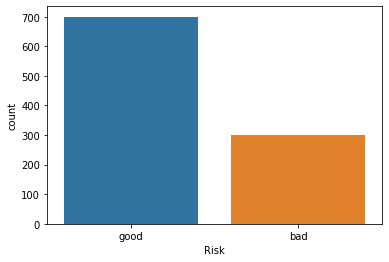

In [7]:
###Check for Imbalanaced data
# count plot on single categorical variable
sns.countplot(x ='Risk', data = df)
 
# Show the plot
plt.show()

Data is imbalanced so we cannot conclude Model performance by simply using Accuracy so we use Confusion matrix here to measure model performance.

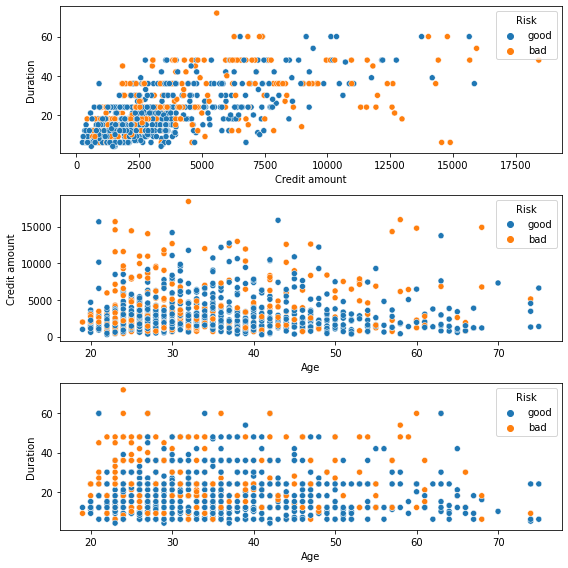

In [8]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()
scatters(df, h="Risk")

Text(0.5, 1.0, 'Correlation Mtrix')

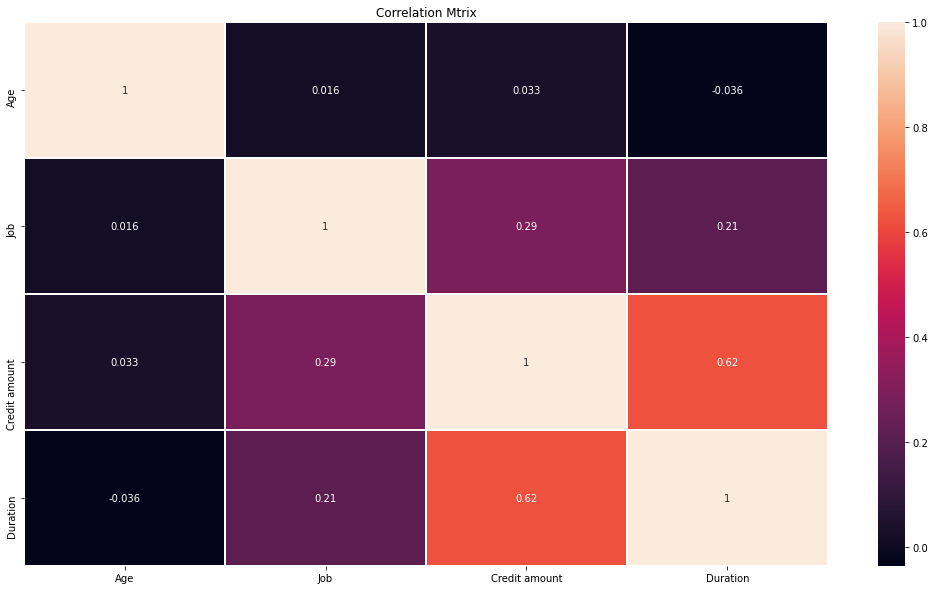

In [9]:
import seaborn as sns
corr_matrix = df.corr()

f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix,linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Mtrix')

We can conclude from corretaion matrix that Credit Amount and Duration are highly co-related 

In [10]:
##Fetch categorical and non-categorical columns
catCols = [col for col in df.columns if df[col].dtype=="O"]
numCols = [col for col in df.columns if df[col].dtype!="O"]
print("Categorical columns",catCols)
print("Non Categorical columns",numCols)


Categorical columns ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
Non Categorical columns ['Age', 'Job', 'Credit amount', 'Duration']


In [26]:
#### LabelEncoder

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
df['Risk']=lb.fit_transform(df['Risk'].astype('str'))  ###Good 1 , Bad 0

In [28]:
X=df[numCols]
y=df['Risk']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Logistic Regression

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [31]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 11,  63],
       [ 10, 166]])

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 11 and 166 are actual predictions, and 63 and 10 are incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

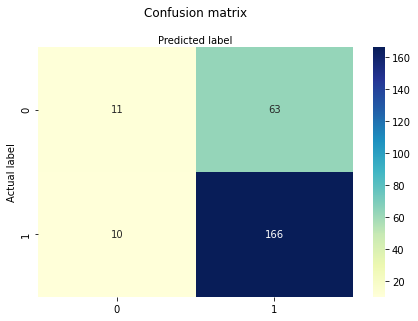

In [32]:
class_names=['0','1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion Matrix Evaluation Metrics**

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test.ravel(), y_pred))
print("Precision:",metrics.precision_score(y_test.ravel(), y_pred))
print("Recall:",metrics.recall_score(y_test.ravel(), y_pred))

Accuracy: 0.708
Precision: 0.7248908296943232
Recall: 0.9431818181818182


Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted how risk is, that risk is 72% of the time.
Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 94% of the time.

**ROC Curve**

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.


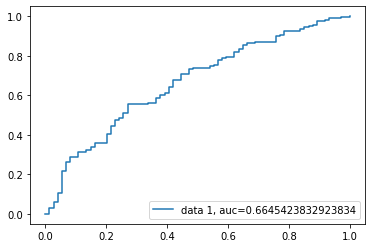

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.66. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [35]:
###Convert Categorical to Numerical
##Method 1
df = pd.get_dummies(df, drop_first=True)  
##Method 2
for col in catCols:
    df[col]=lb.fit_transform(df[col].astype('str'))

In [36]:
X=df.drop(columns=['Risk'])
y=df['Risk']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [38]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [39]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 32,  42],
       [ 28, 148]])

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.7789473684210526
Recall: 0.8409090909090909


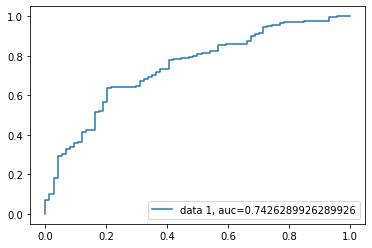

In [41]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [47]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier()

In [48]:
y_pred=clf.predict(X_test)

In [49]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 36,  38],
       [ 19, 157]])

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.772
Precision: 0.8051282051282052
Recall: 0.8920454545454546


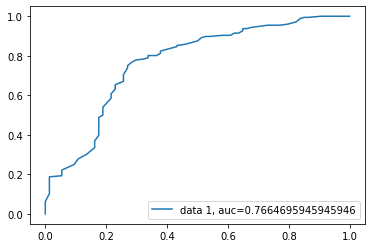

In [51]:
y_pred_proba =clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()